Sebastien suggested to make a random permutation of source positions and re-calculate the PA of optical-to-radio vectors. 

This procedure is repeated for 1000/10000 times for Gaia-to-SX, Gaia-to-K, and Gaia-to-XKa.

In [1]:
from astropy.table import Table, join
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, cos
from random import shuffle

%matplotlib inline

Only look at the results of 1000 iterations.

In [2]:
numbin = 13
bins_set = np.linspace(0, 360, numbin) - 360 / numbin / 2

# 1. Mean distribution

In [3]:
pa_sx_sim = Table.read("../logs/gaia-sx-pa-sim1e6.dat", format="ascii")

cols = pa_sx_sim.colnames

binmean = np.zeros(len(cols))
binstd = np.zeros(len(cols))

for i, col in enumerate(cols):
    binmean[i] = np.mean(pa_sx_sim[col])
    binstd[i] = np.std(pa_sx_sim[col])

PA of Gaia-to-SX (iter_time=1000000)


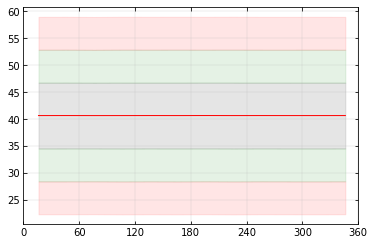

In [4]:
fig, ax = plt.subplots()
ax.plot(bins_set[1:], binmean, "r-", lw=1)
ax.fill_between(bins_set[1:], binmean+binstd, binmean-binstd,
                color="k", alpha=0.1)
ax.fill_between(bins_set[1:], binmean+2*binstd, binmean+binstd,
                color="g", alpha=0.1)
ax.fill_between(bins_set[1:], binmean-binstd, binmean-2*binstd,
                color="g", alpha=0.1)
ax.fill_between(bins_set[1:], binmean+3*binstd, binmean+2*binstd,
                color="r", alpha=0.1)
ax.fill_between(bins_set[1:], binmean-3*binstd, binmean-2*binstd,
                color="r", alpha=0.1)

ax.grid(lw=0.2)
ax.set_xlim([0, 360])
ax.set_xticks(np.arange(0, 361, 60))

print("PA of Gaia-to-SX (iter_time=1000000)")
# plt.savefig("../plots/sim-pa-x-to-k.png")

In [5]:
pa_k_sim = Table.read("../logs/gaia-k-pa-sim1e6.dat", format="ascii")

# cols = pa_k_sim.colnames

binmean = np.zeros(len(cols))
binstd = np.zeros(len(cols))

for i, col in enumerate(cols):
    binmean[i] = np.mean(pa_k_sim[col])
    binstd[i] = np.std(pa_k_sim[col])

PA of Gaia-to-K (iter_time=1000000)


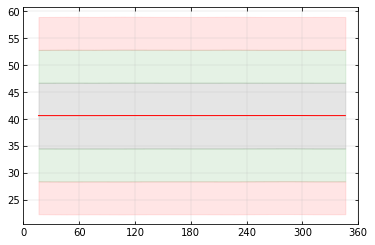

In [6]:
fig, ax = plt.subplots()
ax.plot(bins_set[1:], binmean, "r-", lw=1)
ax.fill_between(bins_set[1:], binmean+binstd, binmean-binstd,
                color="k", alpha=0.1)
ax.fill_between(bins_set[1:], binmean+2*binstd, binmean+binstd,
                color="g", alpha=0.1)
ax.fill_between(bins_set[1:], binmean-binstd, binmean-2*binstd,
                color="g", alpha=0.1)
ax.fill_between(bins_set[1:], binmean+3*binstd, binmean+2*binstd,
                color="r", alpha=0.1)
ax.fill_between(bins_set[1:], binmean-3*binstd, binmean-2*binstd,
                color="r", alpha=0.1)

ax.grid(lw=0.2)
ax.set_xlim([0, 360])
ax.set_xticks(np.arange(0, 361, 60))

print("PA of Gaia-to-K (iter_time=1000000)")
# plt.savefig("../plots/sim-pa-x-to-k.png")

In [7]:
pa_ka_sim = Table.read("../logs/gaia-xka-pa-sim1e6.dat", format="ascii")

# cols = pa_ka_sim.colnames

binmean = np.zeros(len(cols))
binstd = np.zeros(len(cols))

for i, col in enumerate(cols):
    binmean[i] = np.mean(pa_ka_sim[col])
    binstd[i] = np.std(pa_ka_sim[col])

PA of Gaia-to-XKa (iter_time=1000000)


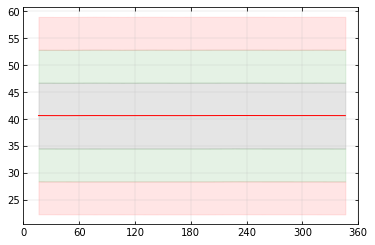

In [8]:
fig, ax = plt.subplots()
ax.plot(bins_set[1:], binmean, "r-", lw=1)
ax.fill_between(bins_set[1:], binmean+binstd, binmean-binstd,
                color="k", alpha=0.1)
ax.fill_between(bins_set[1:], binmean+2*binstd, binmean+binstd,
                color="g", alpha=0.1)
ax.fill_between(bins_set[1:], binmean-binstd, binmean-2*binstd,
                color="g", alpha=0.1)
ax.fill_between(bins_set[1:], binmean+3*binstd, binmean+2*binstd,
                color="r", alpha=0.1)
ax.fill_between(bins_set[1:], binmean-3*binstd, binmean-2*binstd,
                color="r", alpha=0.1)

ax.grid(lw=0.2)

ax.set_xlim([0, 360])
ax.set_xticks(np.arange(0, 361, 60))

print("PA of Gaia-to-XKa (iter_time=1000000)")

# 2. Peak location

Text(0.5, 0, 'Gaia-to-SX PA')

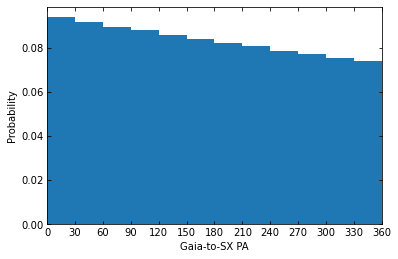

In [9]:
col_names = pa_sx_sim.colnames

n1, n2 = len(pa_sx_sim), len(col_names)
data = np.zeros((n1, n2))

for i, col_name in enumerate(col_names):
    data[:,i] = pa_sx_sim[col_name].data
    
peak = np.max(data, axis=1)
peak_ind = np.argmax(data, axis=1)

# Plot the results
fig, ax = plt.subplots()

ax.hist(peak_ind, bins=np.arange(0, 13, 1), 
        density=True, stacked=True)

ax.set_xlim([0, 11])
ax.set_xticks(np.arange(0, 13, 1))

xlabels = ["{}".format((i)*30) for i in range(numbin)]
ax.set_xticklabels(xlabels)

ax.set_ylabel("Probability")
ax.set_xlabel("Gaia-to-SX PA")

In [10]:
# 120-150
ind1 = 4
peak[peak_ind == 4]

array([51., 48., 52., ..., 50., 53., 61.])

(array([3.9050e+03, 2.4105e+04, 3.0345e+04, 1.7840e+04, 6.8060e+03,
        2.4410e+03, 2.8100e+02, 7.5000e+01, 5.0000e+00, 1.0000e+00]),
 array([43. , 46.2, 49.4, 52.6, 55.8, 59. , 62.2, 65.4, 68.6, 71.8, 75. ]),
 <a list of 10 Patch objects>)

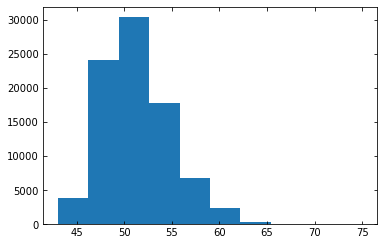

In [11]:
plt.hist(peak[peak_ind == 4])

(array([9.4900e+02, 1.5696e+04, 3.0957e+04, 2.2056e+04, 9.9030e+03,
        3.0920e+03, 8.5500e+02, 1.9800e+02, 3.4000e+01, 1.1000e+01]),
 array([42. , 45.1, 48.2, 51.3, 54.4, 57.5, 60.6, 63.7, 66.8, 69.9, 73. ]),
 <a list of 10 Patch objects>)

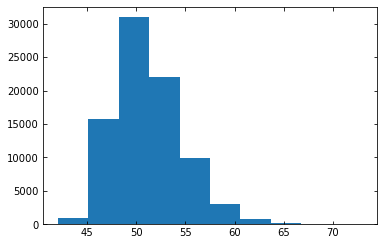

In [12]:
plt.hist(peak[peak_ind == 5])

(array([4.2700e+02, 1.1255e+04, 2.7282e+04, 2.1341e+04, 9.4870e+03,
        3.1870e+03, 8.2400e+02, 2.0400e+02, 3.5000e+01, 6.0000e+00]),
 array([43., 46., 49., 52., 55., 58., 61., 64., 67., 70., 73.]),
 <a list of 10 Patch objects>)

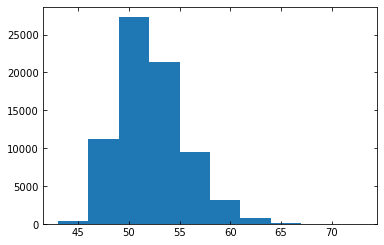

In [13]:
plt.hist(peak[peak_ind == 11])

Text(0.5, 0, 'Gaia-to-SX PA')

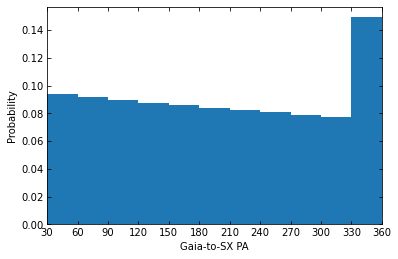

In [14]:
n1, n2 = len(cols), len(pa_sx_sim)
data = np.zeros((n1, n2))

for i, col_name in enumerate(cols):
    data[i,:] = pa_sx_sim[col_name].data
    
peak = np.max(data, axis=0)
peak_ind = np.argmax(data, axis=0)

# Plot the results
fig, ax = plt.subplots()

ax.hist(peak_ind, bins=np.arange(12), density=True, stacked=True)

ax.set_xlim([0, 11])
ax.set_xticks(np.arange(0, 12, 1))

xlabels = ["{}".format((i+1)*30) for i in range(numbin-1)]
ax.set_xticklabels(xlabels)

ax.set_ylabel("Probability")
ax.set_xlabel("Gaia-to-SX PA")